<a href="https://colab.research.google.com/github/Usha-125/Classification-model/blob/main/cifar10_mlp_regularizer_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Experiment  with depth(number of layers)

model 1
build a model with one hidden layer train it and find validation accuracy (128)

model 2
build a model with 3 hidden layers and find validation accuracy(1024,512,256)

model 3
build a model with 5 hidden layers and find validationaccuracy.(1024,512,256,128,64)

plot the vaidation accuracy for all 3 models

plot the vaidation loss for all 3 models
in a single plot

Experiment  with depth(number of layers)

model 1
build a model with SDG optimizer,train it and find validation accuracy (SDG)

model 2
build a model with adam optimzer and find validation accuracy(adam optimizer)

model 3
build a model with RMSprop and find validationaccuracy.(RMSprop optimizer)

plot the vaidation accuracy for all 3 models

plot the vaidation loss for all 3 models
in a single plot
 noteLuse different model name for each for the model

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 94ms/step - accuracy: 0.0098 - loss: 4.6188 - val_accuracy: 0.0085 - val_loss: 4.6060
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 94ms/step - accuracy: 0.0093 - loss: 4.6052 - val_accuracy: 0.0077 - val_loss: 4.6065
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 96ms/step - accuracy: 0.0111 - loss: 4.6051 - val_accuracy: 0.0077 - val_loss: 4.6069
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 29s 92ms/step - accuracy: 0.0095 - loss: 4.6051 - val_accuracy: 0.0077 - val_loss: 4.6072
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 29s 94ms/step - accuracy: 0.0099 - loss: 4.6051 - val_accuracy: 0.0077 - val_loss: 4.6074
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 29s 92ms/step - accuracy: 0.0098 - loss: 4.6051 - val_accuracy: 0.0077 - val_loss: 4.6076
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 95ms/step - accuracy: 0.0100 - loss: 4.6050 - val_accuracy: 0.0077 - val_loss: 4.6077
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 29s 93ms/step - accuracy: 0.0109 - loss: 4.6050 - 

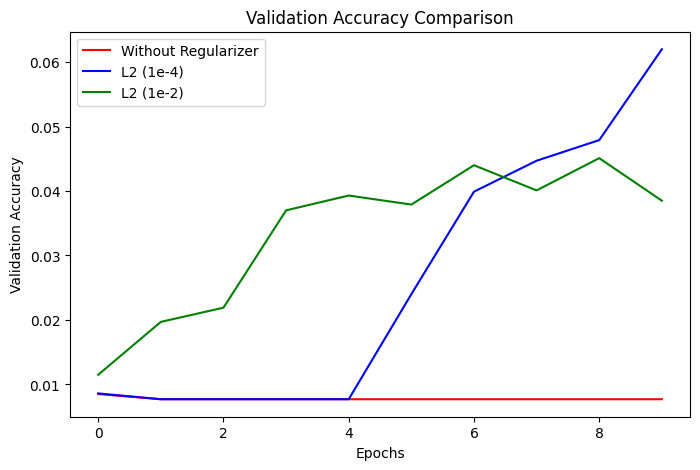

In [10]:
# Importing modules and libraries
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.datasets import cifar100
from keras.utils import to_categorical
from keras import regularizers
from keras.optimizers import Adam
import matplotlib.pyplot as plt

# Loading CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

# --------------------------
# Base Model
# --------------------------
model_base = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(100, activation='softmax')
])

# Compile
model_base.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train
history_base = model_base.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

# Evaluate
loss_base, test_accuracy_base = model_base.evaluate(x_test, y_test)
print(f"Base Model Test Accuracy: {test_accuracy_base:.4f}")

# --------------------------
# Model 2: With L2 Regularizer (1e-4) + Dropout
# --------------------------
model_l2_1e4 = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    Dropout(0.3),
    Dense(512, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    Dropout(0.3),
    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(100, activation='softmax')
])

# Compile
model_l2_1e4.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train
history_l2_1e4 = model_l2_1e4.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

# Evaluate
loss_l2_1e4, test_accuracy_l2_1e4 = model_l2_1e4.evaluate(x_test, y_test)
print(f"L2 (1e-4) Regularized Model Test Accuracy: {test_accuracy_l2_1e4:.4f}")

# --------------------------
# Model 3: With L2 Regularizer (1e-2) + Dropout
# --------------------------
model_l2_1e2 = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(1e-2)),
    Dropout(0.3),
    Dense(512, activation='relu', kernel_regularizer=regularizers.l2(1e-2)),
    Dropout(0.3),
    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(1e-2)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(100, activation='softmax')
])

# Compile
model_l2_1e2.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train
history_l2_1e2 = model_l2_1e2.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

# Evaluate
loss_l2_1e2, test_accuracy_l2_1e2 = model_l2_1e2.evaluate(x_test, y_test)
print(f"L2 (1e-2) Regularized Model Test Accuracy: {test_accuracy_l2_1e2:.4f}")

# --------------------------
# Visualization
# --------------------------
plt.figure(figsize=(8,5))
plt.plot(history_base.history['val_accuracy'], label='Without Regularizer', color='red')
plt.plot(history_l2_1e4.history['val_accuracy'], label='L2 (1e-4)', color='blue')
plt.plot(history_l2_1e2.history['val_accuracy'], label='L2 (1e-2)', color='green')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()
